In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
Books_Data = pd.read_csv('books.csv', error_bad_lines=False)
sns.set_style('darkgrid')

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [16]:
Books_Data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [4]:
Books_Data.shape

(13714, 10)

In [67]:
Books_Data.title.value_counts().sort_values()

Wild Fire (The Hot Zone  #3)                                                                                                                                                    1
Insomnia                                                                                                                                                                        1
Dear Genius...: A Memoir of My Life with Truman Capote                                                                                                                          1
Don't Get Too Comfortable: The Indignities of Coach Class  The Torments of Low Thread Count  The Never-Ending Quest for Artisanal Olive Oil  and Other First World Problems     1
Marathon Man                                                                                                                                                                    1
When Food Is Love: Exploring the Relationship Between Eating and Intimacy                                     

In [5]:
Books_Data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [55]:
Books_Data.language_code.value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
enm          3
cat          3
lat          3
tur          3
ara          2
wel          1
ale          1
dan          1
heb          1
srp          1
msa          1
nor          1
gla          1
Name: language_code, dtype: int64

In [7]:
Books_Data.authors.unique()

array(['J.K. Rowling-Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'Neil Gaiman-Michael Reaves',
       'Brian Froud-Jessica Macbeth', 'Brian Froud'], dtype=object)

In [66]:
Books_Data.title.sort_values().head(10)

2181                        said the shotgun to the head.
4874    $30 Film School: How to Write  Direct  Produce...
1852                                         'Salem's Lot
1851                                         'Salem's Lot
1850                                         'Salem's Lot
1847                                         'Salem's Lot
1846                                         'Salem's Lot
6400                                         'Salem's Lot
3781                                         'Salem's Lot
1845                                         'Salem's Lot
Name: title, dtype: object

In [31]:
Books_Data.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [58]:
Books_Data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [57]:
Books_Data.get_dtype_counts()

float64    1
int64      5
object     4
dtype: int64

# Exploratory Data Analysis 


WHICH ARE THE BOOKS WITH THE MOST OCCURENCE?

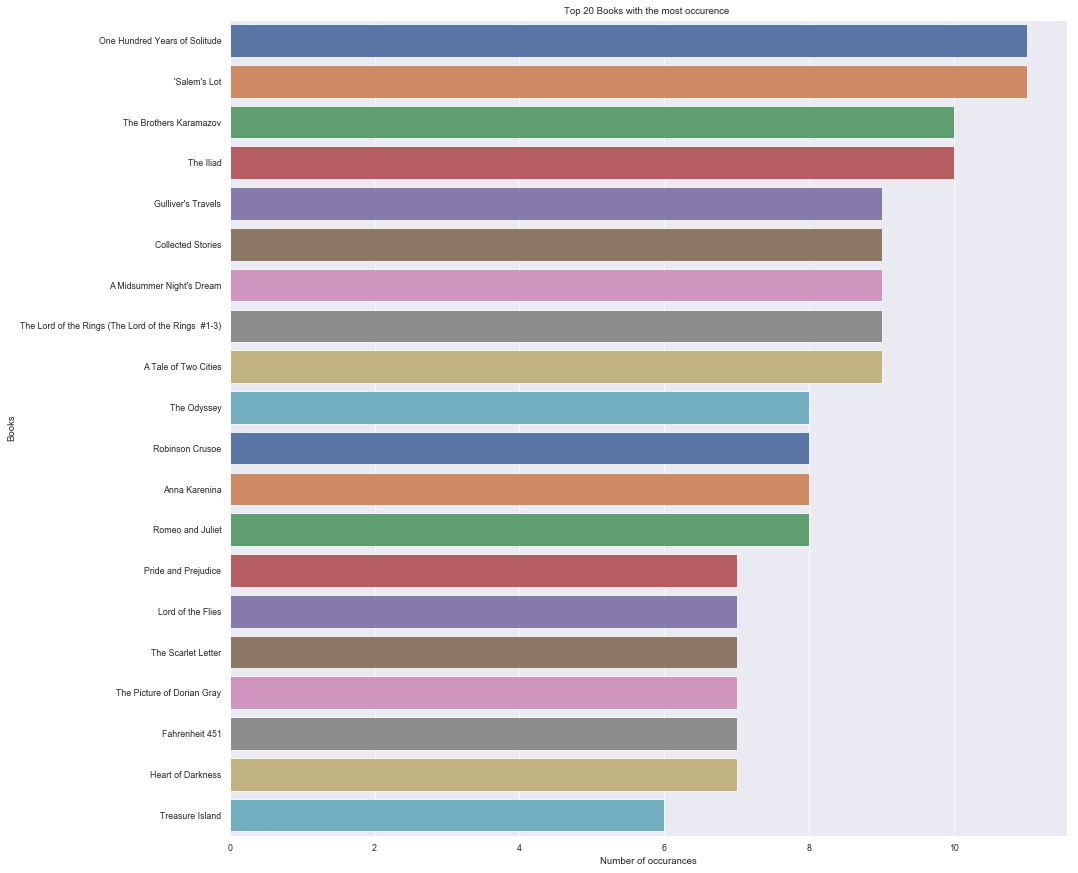

In [89]:
plt.figure(figsize=(15,15))
books = Books_Data['title'].value_counts()[:20]
rating = Books_Data.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Top 20 Books with the most occurence ")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

We can see that One Hundred Years Of Solitude and Salem's List have the most number of occurrances with the same name in the data.

These books have come up in this database over and over again, with various publication editions. From the list, we can see that most of the books from the given chart are either old, steadfast classics or books which are usually assigned to schools. Seems like some books do age well, and these have just braved the flow of time.



WHAT IS THE DISTRIBUTION OF ALL LANGUAGES?

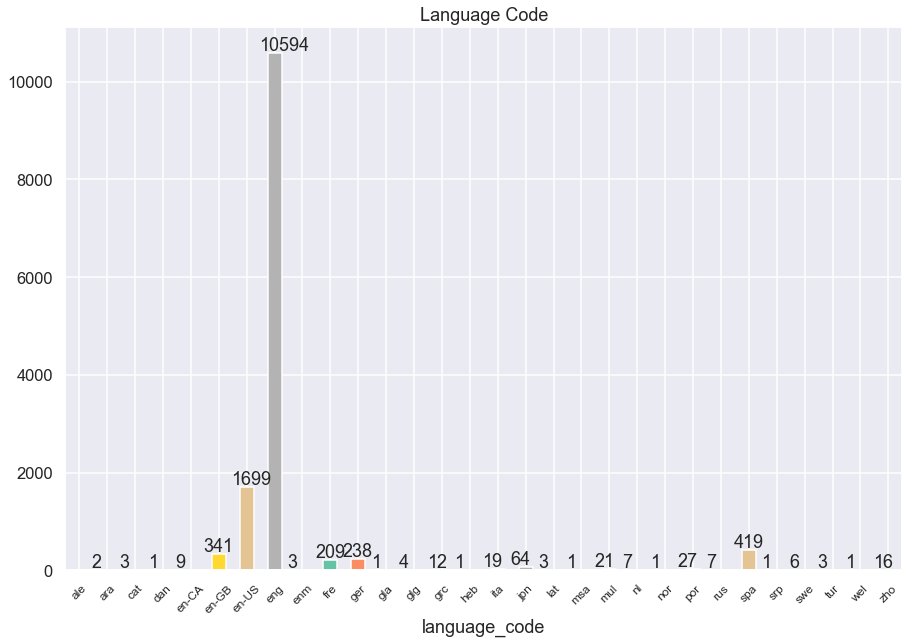

In [90]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax = Books_Data.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 12,rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+50))

From the given graph, we can infer that in the given data, majority of the books are in english languages, with some further categorised into English-US, english-UK and english-CA.



WHICH ARE THE TOP 10 MOST RATED BOOKS?

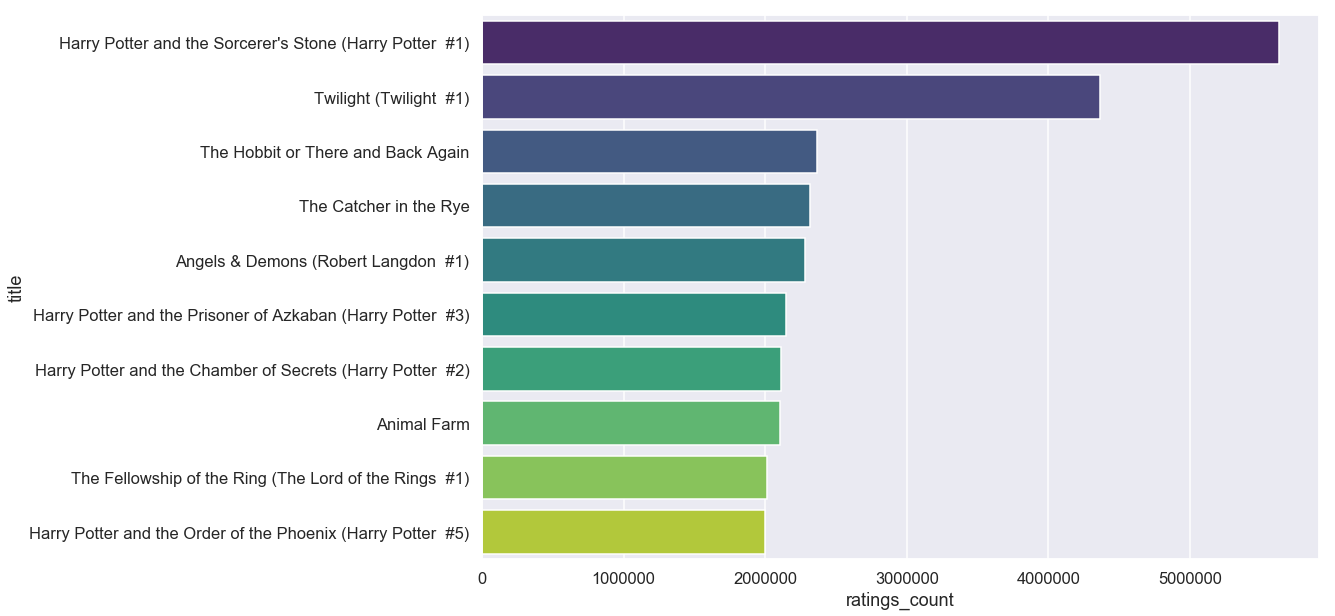

In [91]:
most_rated = Books_Data.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='viridis',errcolor='.5')


1 We can see that the beginning books of the series usually have most of the ratings, i.e, Harry Potter and the Sorcerer's stone, Twilight #1, The Hobbit, Angels and demons #1.

2 Harry potter's first book dominates the section by having more than 5000000 ratings. Infact, apart from a few, such as Catcher in the Rye and Animal Farm, all of the books seem to be from a series of books, getting the notion into our head that once people begin, most of them seem to dive in with the notion of completing it.

Yet, when we glance at the first and fifth book of Harry Potter, we can also notice that there has been a ridiculously huge margin in the number of readers/ratings for the books, signifying that there were people who did not pick up the next book in the series and/or only found the first book to touch their hearts up to an extent to drop a vote



WHICH ARE THE AUTHORS WITH THE MOST BOOKS?

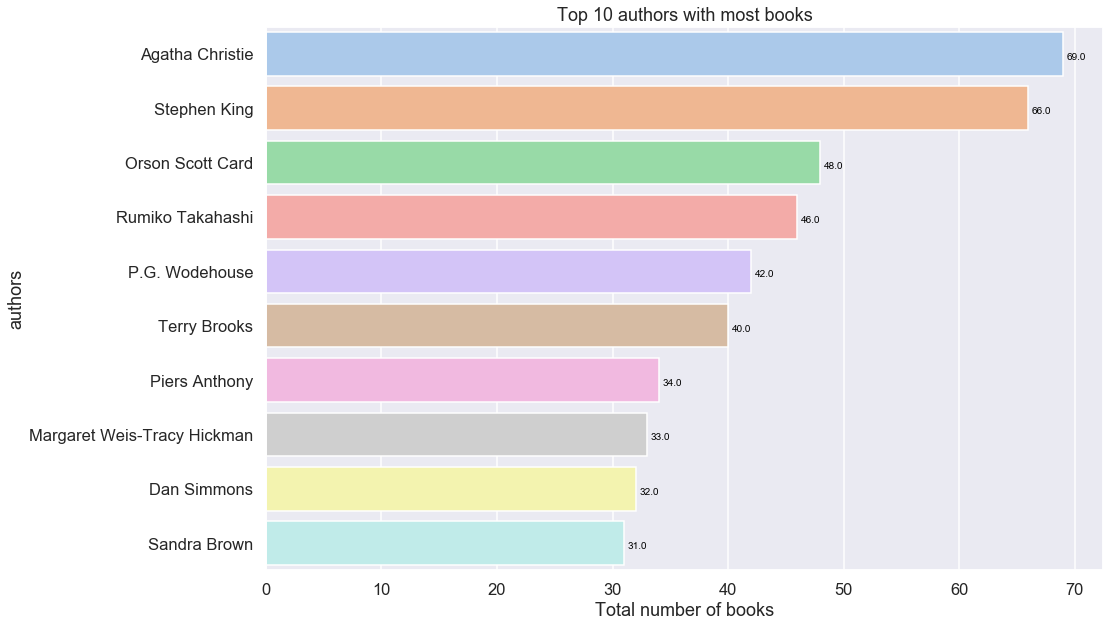

In [92]:
sns.set_context('talk')
most_books = Books_Data.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='pastel',errcolor='.26')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
   ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


We can see from the above plot that Agatha Christie has the most number of books in the list - although a lot of them might be just various publications for the same book, considering the fact that her work has been here for quite a while, spanning decades.

From the names in the list, we can again gather that most of the authors have either been writing for decades, churning numerous books from time to time, or are authors who are regaled as the 'classics' in our history.

It seems, hype does play a role in this.

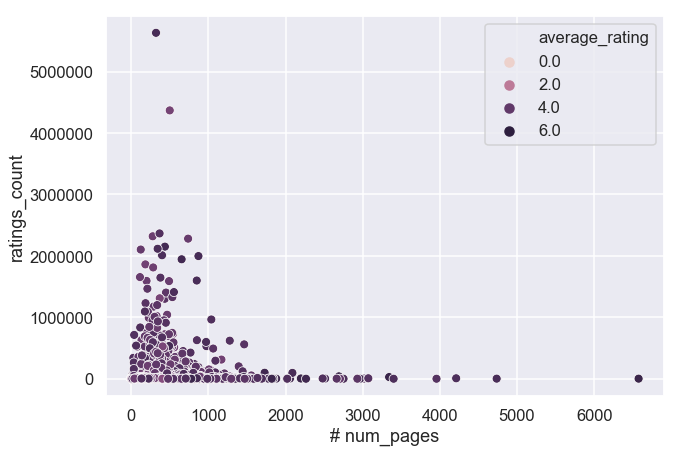

In [93]:
plt.figure(figsize=(10, 7))
sns.scatterplot(Books_Data['# num_pages'], Books_Data['ratings_count'], hue=Books_Data['average_rating'])
plt.show()

WHICH ARE THE TOP 10 HIGHLY RATED AUTHORS?

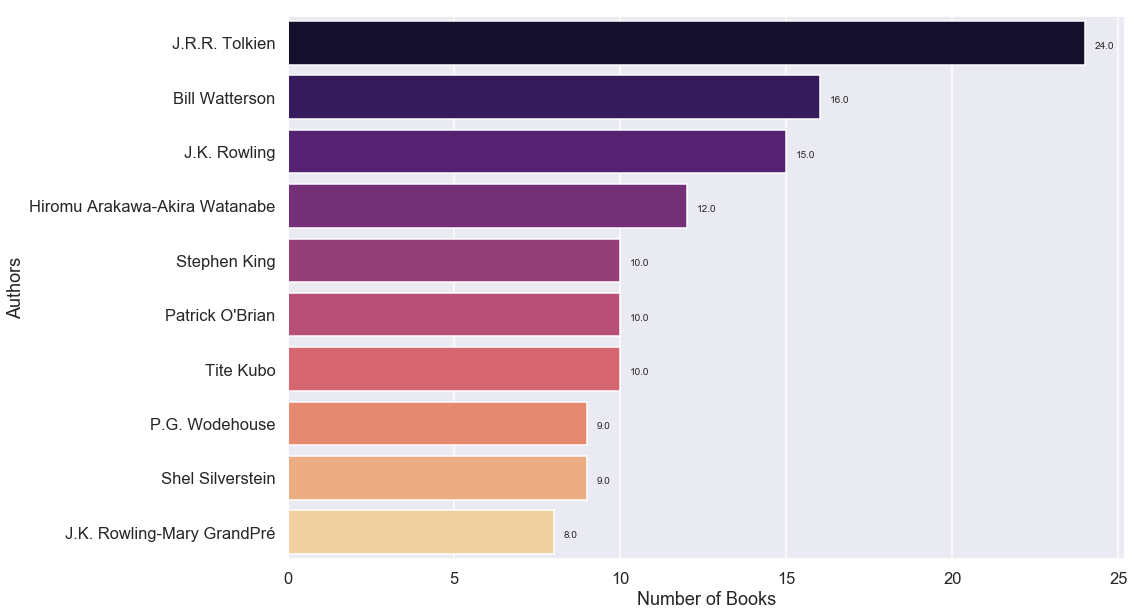

In [27]:
high_rated_author = Books_Data[Books_Data['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',
ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='magma')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10)

Text(0, 0.5, 'Frequency')

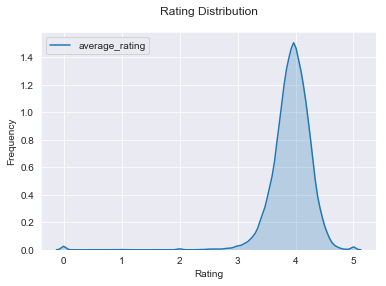

In [7]:
rating= Books_Data.average_rating.astype(float)
sns.kdeplot(Books_Data['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Is there any relationship between ratings and review counts? 

<Figure size 1080x720 with 0 Axes>

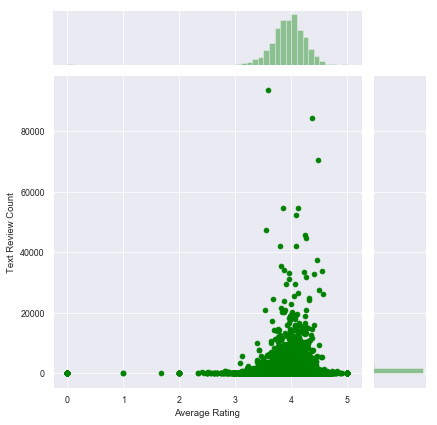

In [110]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
Books_Data.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count',
                  data= Books_Data[['text_reviews_count', 'average_rating']],color='green')
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

WHICH ARE THE BOOKS WITH THE HIGHEST REVIEWS?

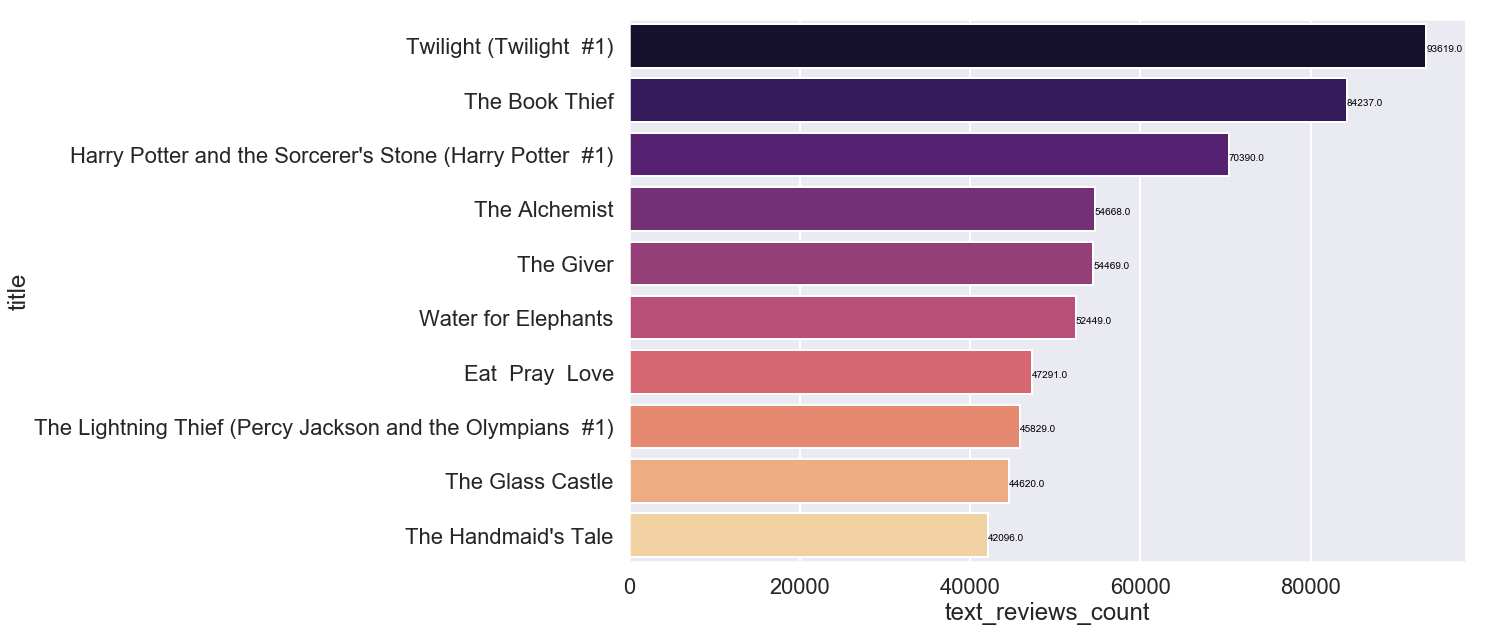

In [98]:
most_text = Books_Data.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.set_context('poster')
ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

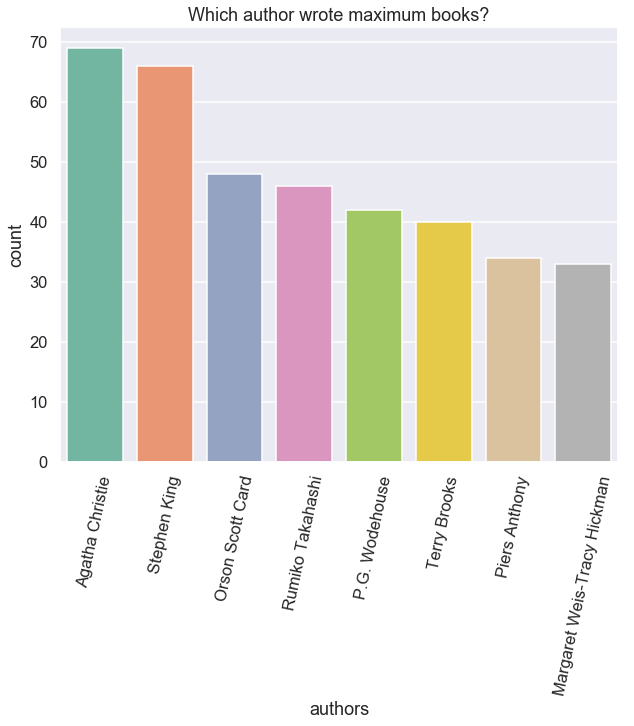

In [28]:
sns.set_palette('Set2')
plt.figure(1, figsize=(10,8))
plt.title("Which author wrote maximum books?")
sns.countplot(x = "authors", order=Books_Data['authors'].value_counts().index[0:8] ,data=Books_Data)
plt.xticks(rotation=78)

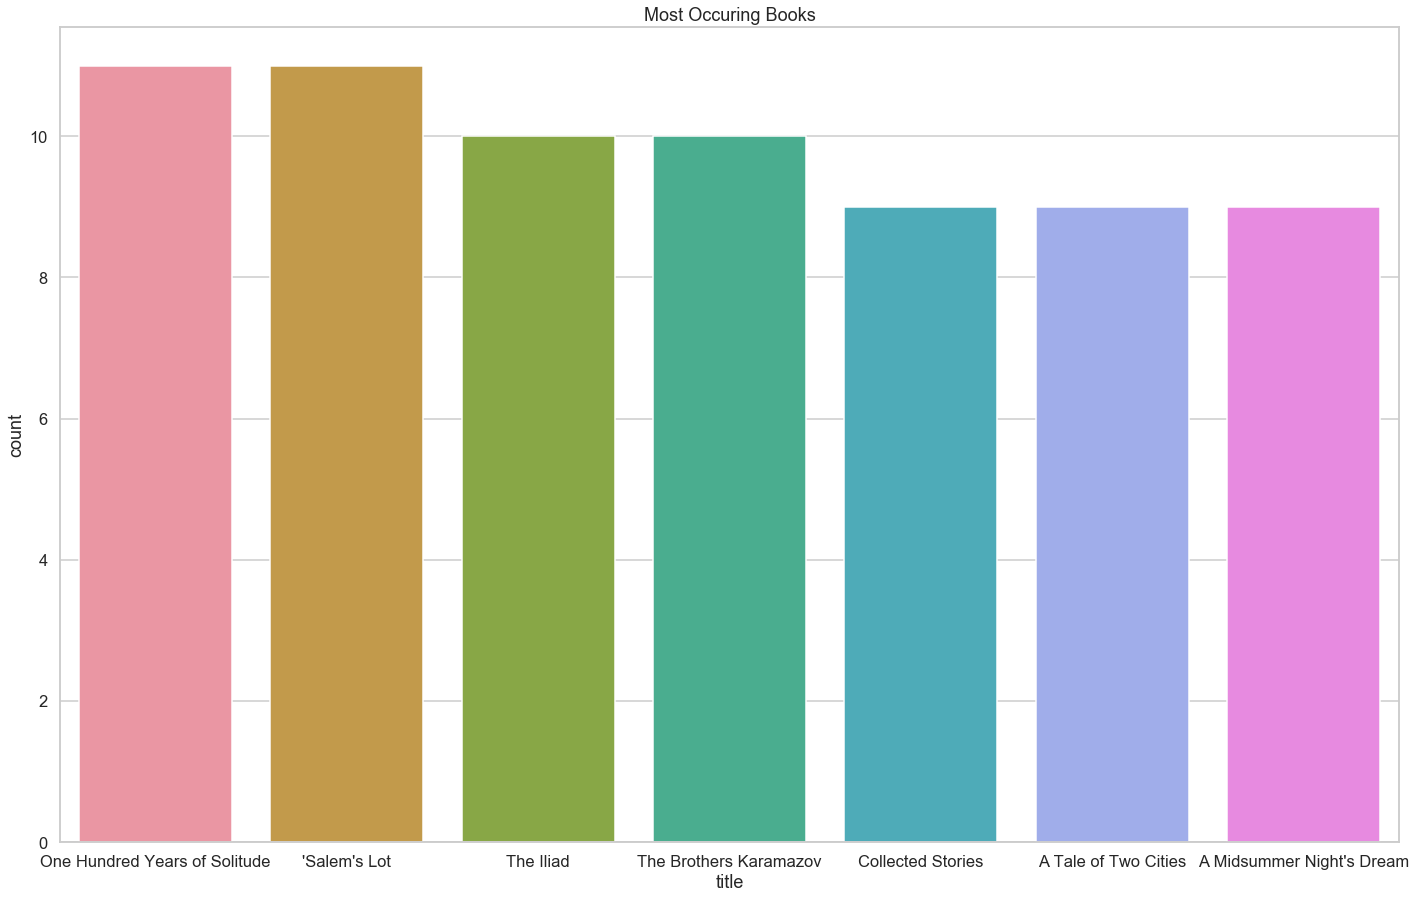

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('icefire_r')
plt.figure(1, figsize=(24,15))
plt.title("Most Occuring Books")
sns.countplot(x = "title", order=Books_Data['title'].value_counts().index[0:7] ,data=Books_Data)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

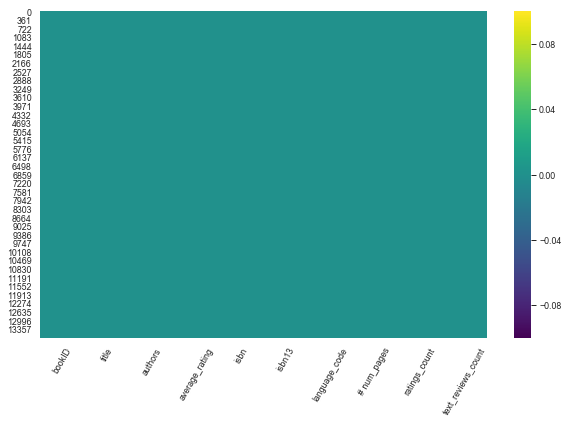

In [101]:
sns.set_context('paper')
plt.figure(figsize=(10,6))
sns.heatmap(Books_Data.isnull(),cmap='viridis')
plt.xticks(rotation=60)

from the obsrvation of the heatmap :
                               |The isnull() function is use to detect missing values.
                               |There are no missing values in  this dataset.

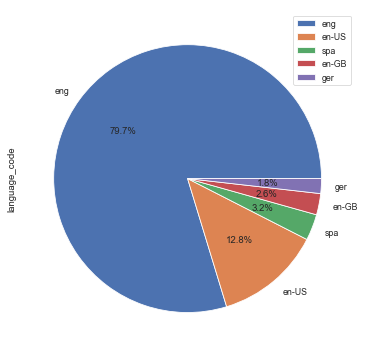

In [121]:
# top 5 languages
sns.set_context('paper')
sns.set_palette('deep')
Books_Data['language_code'].value_counts().head().plot(kind = 'pie',autopct='%1.1f%%',figsize=(6,10)).legend()

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

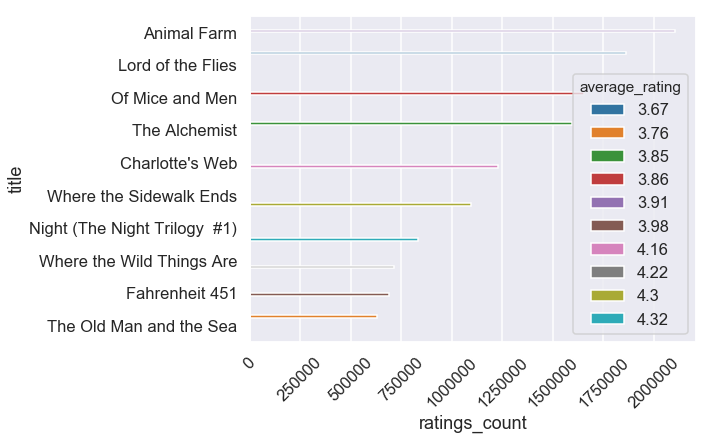

In [10]:
# top 10 books under 200 pages for busy book lovers
sns.set_context('talk')
plt.figure(figsize=(8,6))
under200 = Books_Data[Books_Data['# num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(top10under200['ratings_count'], top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=45)

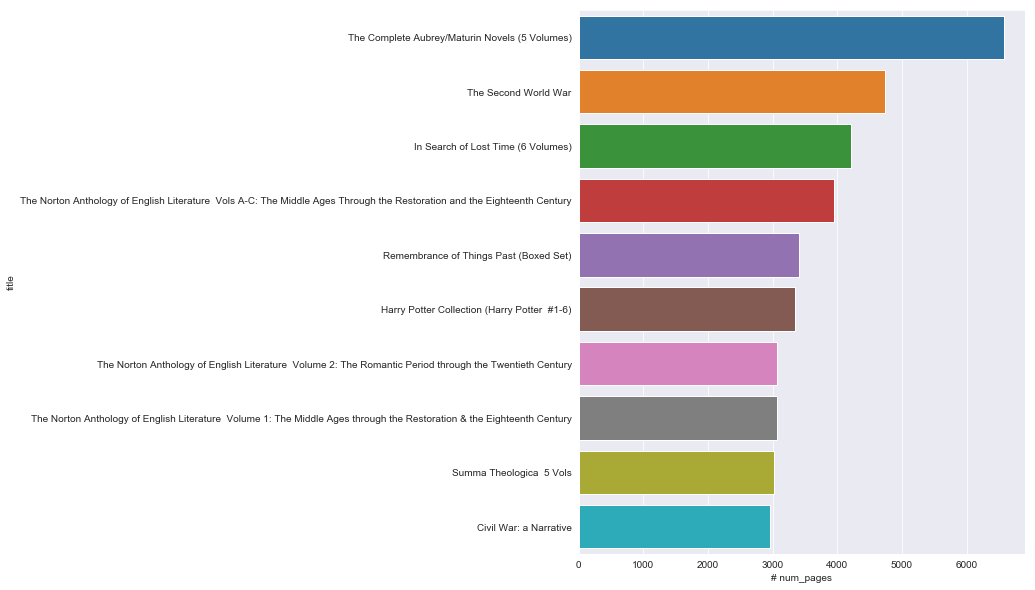

In [9]:
# top 10 longest books
plt.figure(figsize=(8,10))
longest_books = Books_Data.nlargest(10, ['# num_pages']).set_index('title')
sns.barplot(longest_books['# num_pages'], longest_books.index)

Text(0.5, 0, 'Total Ratings')

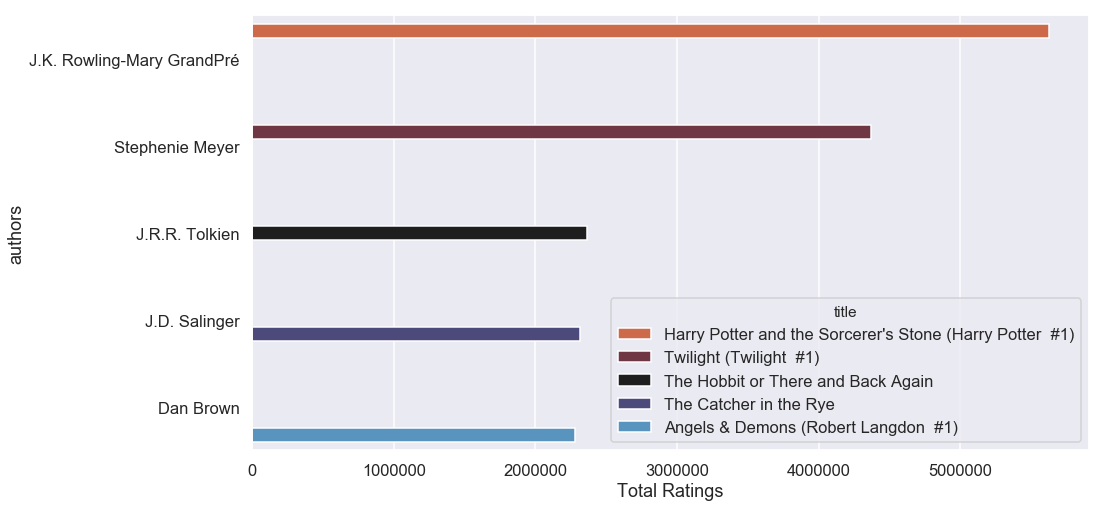

In [24]:
# authors with highest rated books
plt.figure(figsize=(15,8))
authors = Books_Data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'],palette="icefire_r")
plt.xlabel('Total Ratings')

# DATA PREPROCESSING

Data preprocessing is the conversion of data into machine-readable form can be interpreted, analysed and used by machine learning algorithms. In this analysis we will apply anomaly detection and feature engineering techniques.

### 1) Anomaly Detection

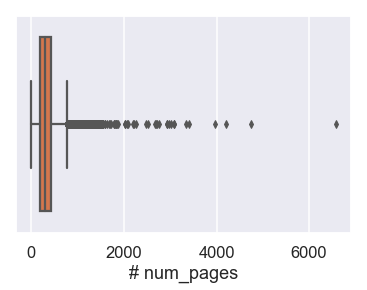

In [26]:
# find no. of pages outliers
sns.boxplot(x=Books_Data['# num_pages'])

Above plot shows points between 1,000 to 6,000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

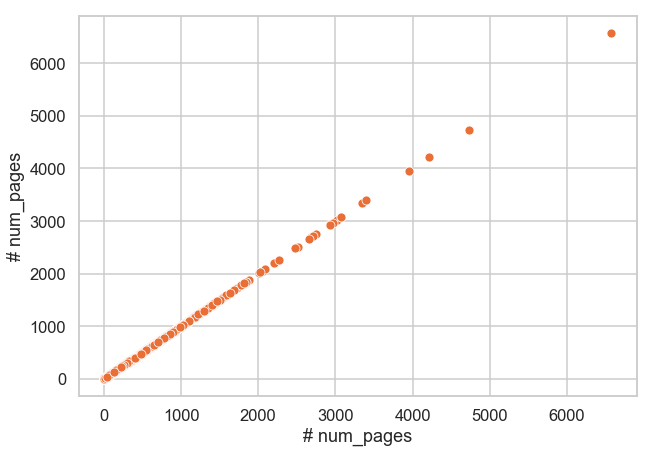

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(Books_Data['# num_pages'],Books_Data['# num_pages'])
plt.show()

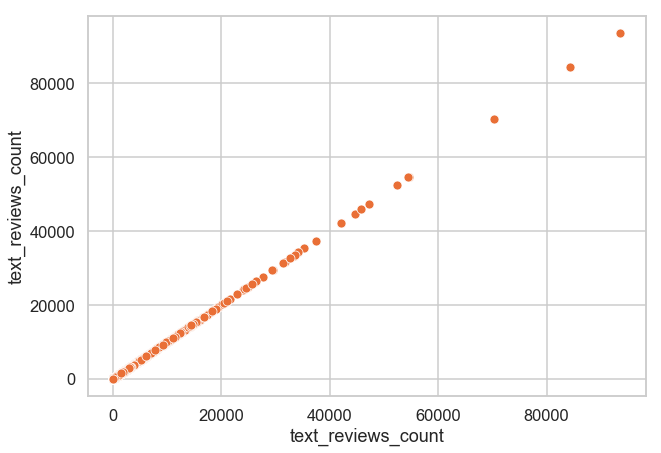

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(Books_Data['text_reviews_count'],Books_Data['text_reviews_count'])
plt.show()